<a href="https://colab.research.google.com/github/ekansh1402/machine_learning/blob/main/Iris_flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importing the Dataset

In [2]:
df=pd.read_csv('/content/Iris Flower - Iris.csv')

##Viewing Dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Analysing the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### feature distribution

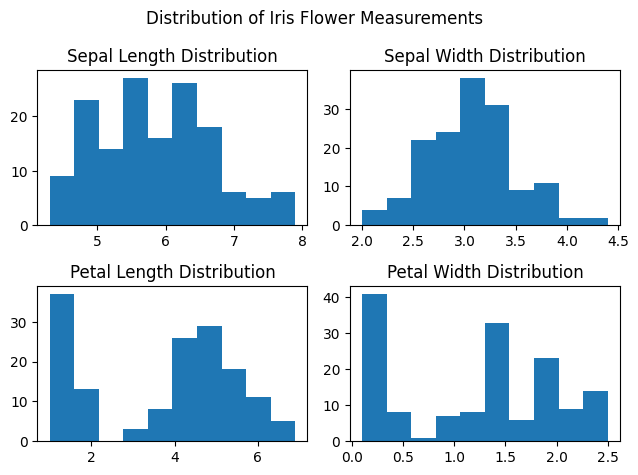

In [5]:
plt.figure()
plt.suptitle('Distribution of Iris Flower Measurements')


plt.subplot(2, 2, 1)
plt.hist(df['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
plt.hist(df['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
plt.hist(df['PetalWidthCm'])
plt.title('Petal Width Distribution')


plt.tight_layout()
plt.show()

### correlation matrix

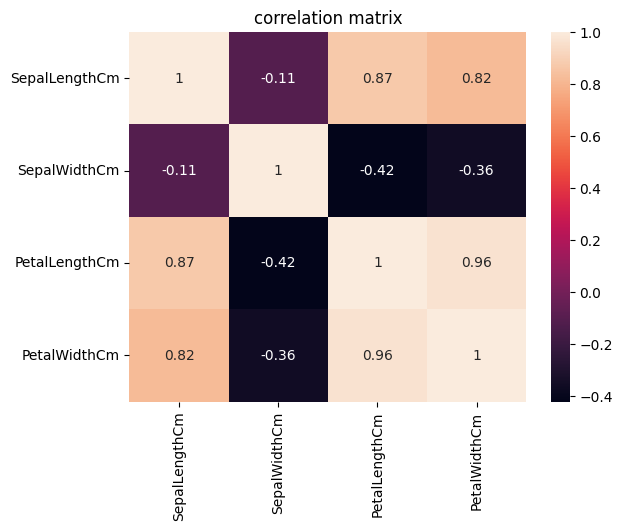

In [6]:
import seaborn as sns
cor=df.iloc[:,1:-1].corr()
sns.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show()

##Duplicates

In [7]:
print("number of duplicated rows:",df.duplicated().sum())


number of duplicated rows: 0


## Creating feature set and label set

In [8]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

## Data Pre-Processing

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Encoding y

In [10]:
le=LabelEncoder()
y=le.fit_transform(y)
print("number of labels with label 0:",y[y==0].size)
print("number of labels with label 1:",y[y==1].size)
print("number of labels with label 2:",y[y==2].size)

number of labels with label 0: 50
number of labels with label 1: 50
number of labels with label 2: 50


### Data splitting

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)

### Feature Scaling

In [12]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model implementations:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score

In [14]:
def models(model ,X_train,X_test,y_train,t_test):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy_sc=accuracy_score(y_test,y_pred)
  precision_sc_micro=precision_score(y_test,y_pred,average='micro')
  precision_sc_macro=precision_score(y_test,y_pred,average='macro')
  recall_sc_micro=recall_score(y_test,y_pred,average='micro')
  recall_sc_macro=recall_score(y_test,y_pred,average='macro')
  f1_sc_micro=f1_score(y_test,y_pred,average='micro')
  f1_sc_macro=f1_score(y_test,y_pred,average='macro')

  conf_matrix=confusion_matrix(y_test,y_pred)
  sns.heatmap(conf_matrix,annot=True)
  plt.title('confusion matrix')
  plt.show()

  return [accuracy_sc,precision_sc_micro,precision_sc_macro,recall_sc_micro,recall_sc_macro,f1_sc_micro,f1_sc_macro]



In [15]:
score = pd.DataFrame(index = ["accuracy_sc","precision_sc_micro","precision_sc_macro","recall_sc_micro","recall_sc_macro","f1_sc_micro","f1_sc_macro",])


## Model-1 Logistics Regression

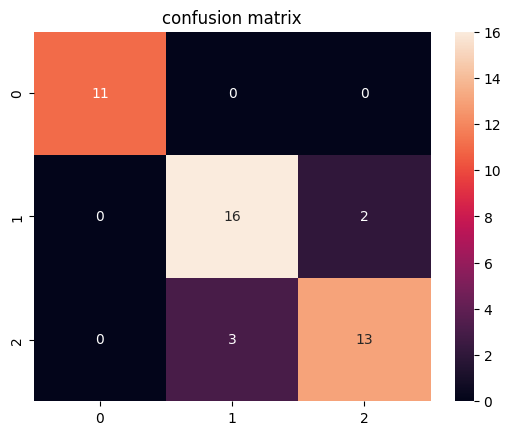

                    Logistic Regression
accuracy_sc                    0.888889
precision_sc_micro             0.888889
precision_sc_macro             0.902924
recall_sc_micro                0.888889
recall_sc_macro                0.900463
f1_sc_micro                    0.888889
f1_sc_macro                    0.901192


In [16]:
classifier=LogisticRegression(fit_intercept=True)
score['Logistic Regression']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

## Cross-validation & hyper parameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [18]:
grid_para=[{'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1',],
              'solver':[  'liblinear', 'saga']
            }
           ,{'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
classifier=LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = grid_para,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,error_score='raise')
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 98.18 %
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


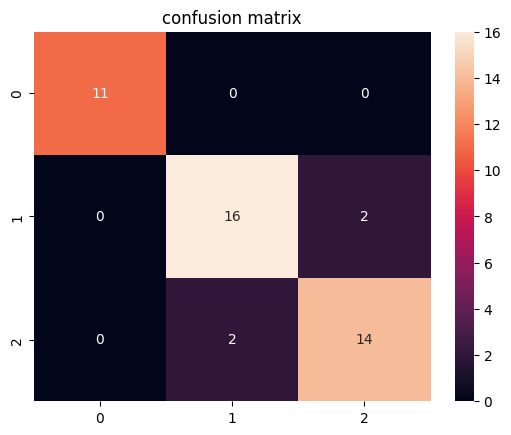

                    Logistic Regression  Logistic Regression optimized
accuracy_sc                    0.888889                       0.911111
precision_sc_micro             0.888889                       0.911111
precision_sc_macro             0.902924                       0.921296
recall_sc_micro                0.888889                       0.911111
recall_sc_macro                0.900463                       0.921296
f1_sc_micro                    0.888889                       0.911111
f1_sc_macro                    0.901192                       0.921296


In [19]:
classifier=LogisticRegression(C= 10, penalty= 'l1', solver= 'saga')
score['Logistic Regression optimized']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

## Model -2 SVM(Support Vector Machine)

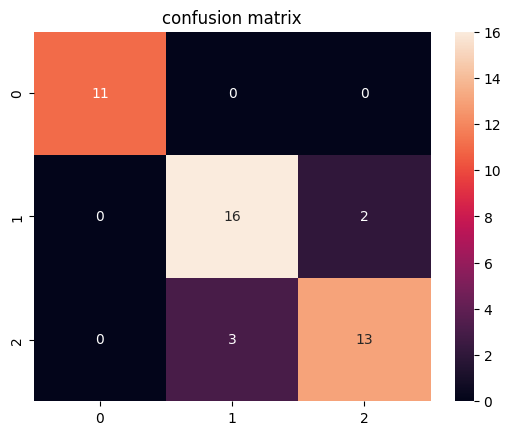

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  
accuracy_sc         0.888889       0.911111  
precision_sc_micro  0.888889       0.911111  
precision_sc_macro  0.902924       0.921296  
recall_sc_micro     0.888889       0.911111  
recall_sc_macro     0.900463       0.921296  
f1_sc_micro         0.888889       0.911111  
f1_sc_macro         0.901192       0.921296  


In [25]:
classifier=SVC(kernel='rbf',random_state=0)
score['SVM']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

### Cross- Validation & Hyperparameter Tuning

In [22]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
classifier=SVC(random_state=0)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.09 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


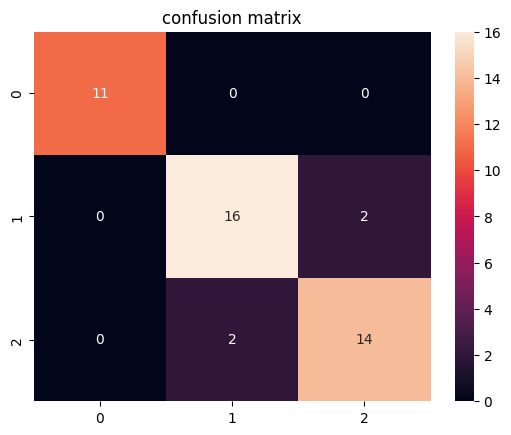

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd  
accuracy_sc         0.888889       0.911111      0.911111  
precision_sc_micro  0.888889       0.911111      0.911111  
precision_sc_macro  0.902924       0.921296      0.921296  
recall_sc_micro     0.888889       0.911111      0.911111  
recall_sc_macro     0.900463       0.921296      0.921296  
f1_sc_micro         0.888889       0.911111    

In [29]:
classifier=SVC(C=0.25 ,kernel='linear',random_state=0)
score['SVM_optimized']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

In [35]:
score.drop(["SVM_optimizd"], axis=1)

,Logistic Regression,Logistic Regression optimized,SVM,SVM_optimized
accuracy_sc,0.888889,0.911111,0.888889,0.911111
precision_sc_micro,0.888889,0.911111,0.888889,0.911111
precision_sc_macro,0.902924,0.921296,0.902924,0.921296
recall_sc_micro,0.888889,0.911111,0.888889,0.911111
recall_sc_macro,0.900463,0.921296,0.900463,0.921296
f1_sc_micro,0.888889,0.911111,0.888889,0.911111
f1_sc_macro,0.901192,0.921296,0.901192,0.921296


## Model-3 KNN

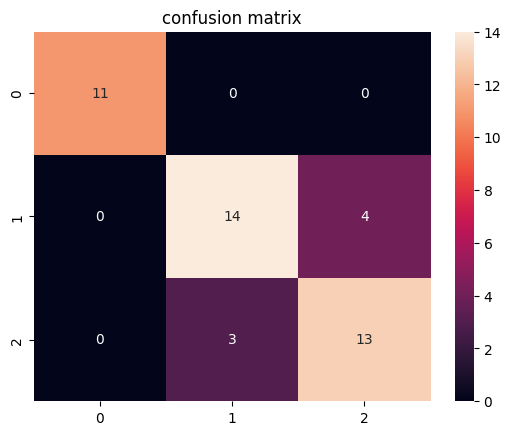

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd       KNN  
accuracy_sc         0.888889       0.911111      0.911111  0.844444  
precision_sc_micro  0.888889       0.911111      0.911111  0.844444  
precision_sc_macro  0.902924       0.921296      0.921296  0.862745  
recall_sc_micro     0.888889       0.911111      0.911111  0.844444  
recall_sc_macro     0.900463       0.921296      0.921296

In [36]:
classifier=KNeighborsClassifier(n_neighbors=5)
score['KNN']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

###  Cross- Validation & Hyperparameter Tuning

In [39]:
parameters = [{'n_neighbors': [5,7,9,11,15],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2,3,4]}]
classifier=KNeighborsClassifier()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 100.00 %
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}


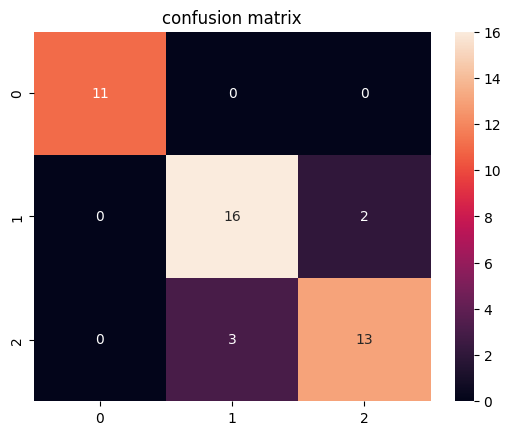

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd       KNN  \
accuracy_sc         0.888889       0.911111      0.911111  0.844444   
precision_sc_micro  0.888889       0.911111      0.911111  0.844444   
precision_sc_macro  0.902924       0.921296      0.921296  0.862745   
recall_sc_micro     0.888889       0.911111      0.911111  0.844444   
recall_sc_macro     0.900463       0.921296      0.9

In [41]:
classifier=KNeighborsClassifier(n_neighbors=9,algorithm='auto',p=1)
score['KNN_optimized']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

##Model-4 Decision Tree

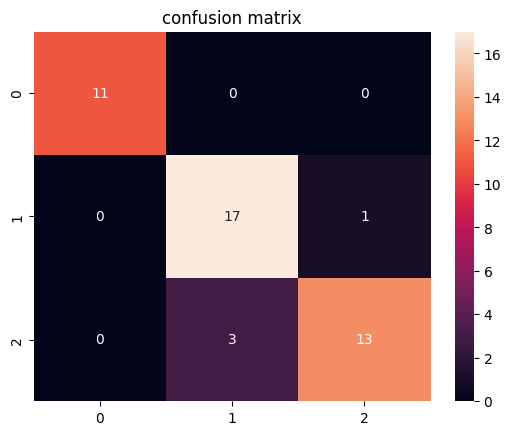

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd       KNN  \
accuracy_sc         0.888889       0.911111      0.911111  0.844444   
precision_sc_micro  0.888889       0.911111      0.911111  0.844444   
precision_sc_macro  0.902924       0.921296      0.921296  0.862745   
recall_sc_micro     0.888889       0.911111      0.911111  0.844444   
recall_sc_macro     0.900463       0.921296      0.9

In [42]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
score['Decision Tree']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

###  Cross- Validation & Hyperparameter Tuning

In [46]:
parameters = [{'criterion':['gini', 'entropy', 'log_loss'] , 'splitter':['best', 'random']}]
classifier=DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 98.18 %
Best Parameters: {'criterion': 'gini', 'splitter': 'best'}


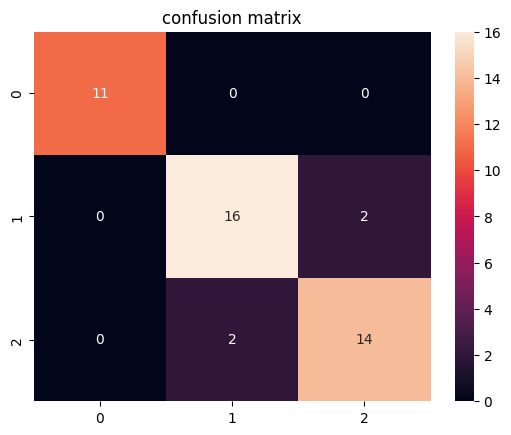

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd       KNN  \
accuracy_sc         0.888889       0.911111      0.911111  0.844444   
precision_sc_micro  0.888889       0.911111      0.911111  0.844444   
precision_sc_macro  0.902924       0.921296      0.921296  0.862745   
recall_sc_micro     0.888889       0.911111      0.911111  0.844444   
recall_sc_macro     0.900463       0.921296      0.9

In [44]:
classifier=DecisionTreeClassifier(criterion='log_loss',random_state=0,splitter='random')
score['Decision Tree_optimized']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

Model-5 Random Forest

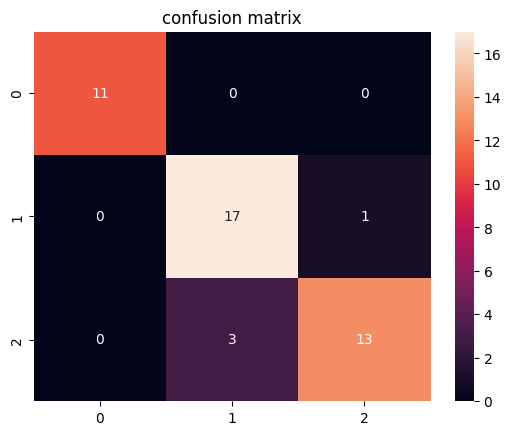

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd       KNN  \
accuracy_sc         0.888889       0.911111      0.911111  0.844444   
precision_sc_micro  0.888889       0.911111      0.911111  0.844444   
precision_sc_macro  0.902924       0.921296      0.921296  0.862745   
recall_sc_micro     0.888889       0.911111      0.911111  0.844444   
recall_sc_macro     0.900463       0.921296      0.9

In [47]:
classifier=RandomForestClassifier(n_estimators=10)
score['Random Forest']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

 ### Cross- Validation & Hyperparameter Tuning

In [50]:
parameters = [{'n_estimators':np.arange(10,101),'criterion':['gini', 'entropy', 'log_loss']}]
classifier=RandomForestClassifier()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.09 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 17}


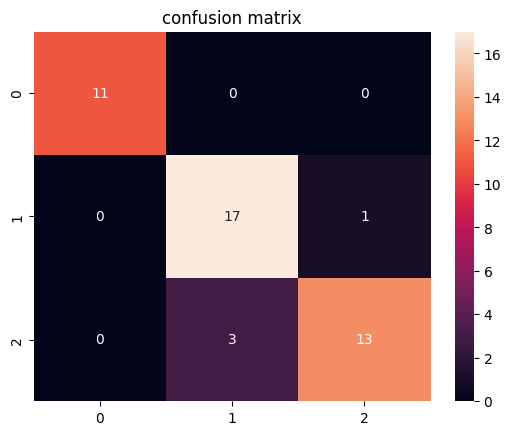

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd       KNN  \
accuracy_sc         0.888889       0.911111      0.911111  0.844444   
precision_sc_micro  0.888889       0.911111      0.911111  0.844444   
precision_sc_macro  0.902924       0.921296      0.921296  0.862745   
recall_sc_micro     0.888889       0.911111      0.911111  0.844444   
recall_sc_macro     0.900463       0.921296      0.9

In [51]:
classifier=RandomForestClassifier(n_estimators=17,criterion='gini')
score['Random Forest_optimized']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

## Model-6 XG-boost

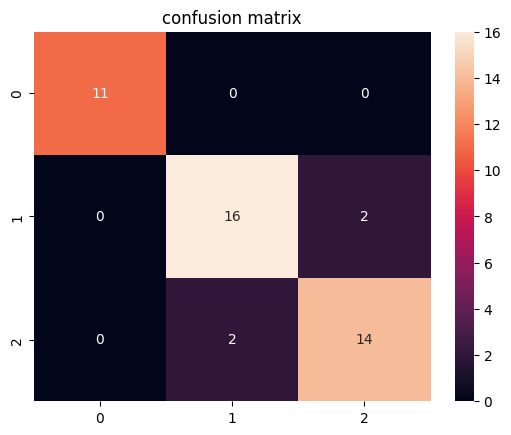

                    Logistic Regression  Logistic Regression optimized  \
accuracy_sc                    0.888889                       0.911111   
precision_sc_micro             0.888889                       0.911111   
precision_sc_macro             0.902924                       0.921296   
recall_sc_micro                0.888889                       0.911111   
recall_sc_macro                0.900463                       0.921296   
f1_sc_micro                    0.888889                       0.911111   
f1_sc_macro                    0.901192                       0.921296   

                         SVM  SVM_optimized  SVM_optimizd       KNN  \
accuracy_sc         0.888889       0.911111      0.911111  0.844444   
precision_sc_micro  0.888889       0.911111      0.911111  0.844444   
precision_sc_macro  0.902924       0.921296      0.921296  0.862745   
recall_sc_micro     0.888889       0.911111      0.911111  0.844444   
recall_sc_macro     0.900463       0.921296      0.9

In [52]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
score['XG-boost']=models(classifier,X_train,X_test,y_train,y_test)
print(score)

 ### Cross- Validation & Hyperparameter Tuning

In [69]:
parameters = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}
classifier=XGBClassifier()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

KeyboardInterrupt: 

## selecting best model

In [57]:
score_t = score.transpose()


In [66]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric].max()
        best_model_test = df[df[metric] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [68]:
metrics = ["accuracy_sc","precision_sc_micro","precision_sc_macro","recall_sc_micro","recall_sc_macro","f1_sc_micro","f1_sc_macro"]

best_models = select_best_model(score_t, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {score_t[metric][best_model].round(4)}")

The best models are:
accuracy_sc: Logistic Regression optimized - 0.9111
precision_sc_micro: Logistic Regression optimized - 0.9111
precision_sc_macro: Decision Tree - 0.9262
recall_sc_micro: Logistic Regression optimized - 0.9111
recall_sc_macro: Logistic Regression optimized - 0.9213
f1_sc_micro: Logistic Regression optimized - 0.9111
f1_sc_macro: Logistic Regression optimized - 0.9213
